## Import Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os 

## Read CSV File / Import dataset

In [2]:
co2_df = pd.read_csv("/Users/rojaywhite/Desktop/CO2 EDA /res/Data.csv")
print('Rows: {} | Col: {}'.format(co2_df.shape[0],co2_df.shape[1]))

Rows: 36 | Col: 6


## Exploring CO2 Dataset [EDA]

* 1st Make a copy of the original dataset

In [3]:
co2dfCopy = co2_df.copy(deep="true")
co2dfCopy.head()
print("Original Dataframe: 'co2_df'")
print(co2_df.head())
print("\n________________________________________________________________\n")
print("Copied Dataframe: 'co2dfCopy'")
print(co2dfCopy.head())

Original Dataframe: 'co2_df'
          Car       Model  Volume  Weight  CO2  Unnamed: 5
0      Toyota        Aygo    1000     790   99         NaN
1  Mitsubishi  Space Star    1200    1160   95         NaN
2       Skoda      Citigo    1000     929   95         NaN
3        Fiat         500     900     865   90         NaN
4        Mini      Cooper    1500    1140  105         NaN

________________________________________________________________

Copied Dataframe: 'co2dfCopy'
          Car       Model  Volume  Weight  CO2  Unnamed: 5
0      Toyota        Aygo    1000     790   99         NaN
1  Mitsubishi  Space Star    1200    1160   95         NaN
2       Skoda      Citigo    1000     929   95         NaN
3        Fiat         500     900     865   90         NaN
4        Mini      Cooper    1500    1140  105         NaN


In [4]:
co2dfCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Car         36 non-null     object 
 1   Model       36 non-null     object 
 2   Volume      36 non-null     int64  
 3   Weight      36 non-null     int64  
 4   CO2         36 non-null     int64  
 5   Unnamed: 5  0 non-null      float64
dtypes: float64(1), int64(3), object(2)
memory usage: 1.8+ KB


In [5]:
#viewing columns in the dataframe
pd.DataFrame({"Columns": co2dfCopy.columns})

,Columns
0,Car
1,Model
2,Volume
3,Weight
4,CO2
5,Unnamed: 5


In [6]:
#checking data types
data_types = dict(co2dfCopy.dtypes)
print(data_types)

{'Car': dtype('O'), 'Model': dtype('O'), 'Volume': dtype('int64'), 'Weight': dtype('int64'), 'CO2': dtype('int64'), 'Unnamed: 5': dtype('float64')}


In [7]:
#checking for unique values within the columns
cols = co2dfCopy[["Car", "Model", "Volume", "Weight", "CO2",]]
cols.nunique()

Car       17
Model     35
Volume    12
Weight    31
CO2       17
dtype: int64

In [8]:
vehicle = co2dfCopy[["Car", "Model", "CO2"]]
vehicle

,Car,Model,CO2
0,Toyota,Aygo,99
1,Mitsubishi,Space Star,95
2,Skoda,Citigo,95
3,Fiat,500,90
4,Mini,Cooper,105
5,VW,Up!,105
6,Skoda,Fabia,90
7,Mercedes,A-Class,92
8,Ford,Fiesta,98
9,Audi,A1,99


In [9]:
#checking for any unique car models
co2dfCopy["Model"].unique()

array(['Aygo', 'Space Star', 'Citigo', '500', 'Cooper', 'Up!', 'Fabia',
       'A-Class', 'Fiesta', 'A1', 'I20', 'Swift', 'Civic', 'I30', 'Astra',
       '1', '3', 'Rapid', 'Focus', 'Mondeo', 'Insignia', 'C-Class',
       'Octavia', 'S60', 'CLA', 'A4', 'A6', 'V70', '5', 'E-Class', 'XC70',
       'B-Max', '2', 'Zafira', 'SLK'], dtype=object)

In [10]:
#filtering for specific car models
co2dfCopy[ (co2dfCopy["Model"] == "500") |(co2dfCopy["Model"] == "1")|(co2dfCopy["Model"] == "3")|(co2dfCopy["Model"] == "5")|(co2dfCopy["Model"] == "2")]

,Car,Model,Volume,Weight,CO2,Unnamed: 5
3,Fiat,500,900,865,90,NaN
16,BMW,1,1600,1365,99,NaN
17,Mazda,3,2200,1280,104,NaN
29,BMW,5,2000,1705,114,NaN
33,BMW,2,1600,1390,108,NaN


* these car models are numbers contrasting the others which are names

* note, they are still "Object datatype"

In [11]:
data_types = dict(co2dfCopy.dtypes)
print(data_types)

{'Car': dtype('O'), 'Model': dtype('O'), 'Volume': dtype('int64'), 'Weight': dtype('int64'), 'CO2': dtype('int64'), 'Unnamed: 5': dtype('float64')}


In [12]:
co2dfCopy.sample(n=10)

,Car,Model,Volume,Weight,CO2,Unnamed: 5
2,Skoda,Citigo,1000,929,95,NaN
32,Ford,B-Max,1600,1235,104,NaN
10,Hyundai,I20,1100,980,99,NaN
14,Hundai,I30,1600,1326,97,NaN
3,Fiat,500,900,865,90,NaN
5,VW,Up!,1000,929,105,NaN
24,Volvo,S60,2000,1415,99,NaN
4,Mini,Cooper,1500,1140,105,NaN
1,Mitsubishi,Space Star,1200,1160,95,NaN
7,Mercedes,A-Class,1500,1365,92,NaN


## Cleaning the Dataset
#### Nan Values in Dataset

In [13]:
co2dfCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Car         36 non-null     object 
 1   Model       36 non-null     object 
 2   Volume      36 non-null     int64  
 3   Weight      36 non-null     int64  
 4   CO2         36 non-null     int64  
 5   Unnamed: 5  0 non-null      float64
dtypes: float64(1), int64(3), object(2)
memory usage: 1.8+ KB


In [14]:
co2dfCopy.isnull().sum()

Car            0
Model          0
Volume         0
Weight         0
CO2            0
Unnamed: 5    36
dtype: int64

* Column "Unnamed: 5" has all Null values

In [15]:
co2dfCopy.rename(columns={"Unnamed: 5" : "Unnamed"}, inplace=True)

In [16]:
co2dfCopy["Unnamed"].fillna(value="No name", inplace=True)
co2dfCopy["Unnamed"].sample(n=10)

11    No name
28    No name
23    No name
26    No name
18    No name
20    No name
29    No name
32    No name
3     No name
31    No name
Name: Unnamed, dtype: object

* Lets drop the "Un-Named" column. there is no need for it

In [17]:
#drop the column "Unnamed"
co2dfCopy.drop('Unnamed', axis=1, inplace=True)
pd.DataFrame({"Columns in Dataframe": co2dfCopy.columns})

,Columns in Dataframe
0,Car
1,Model
2,Volume
3,Weight
4,CO2


## Visualizations / Analysis

<AxesSubplot:title={'center':' Vehicle Count'}>

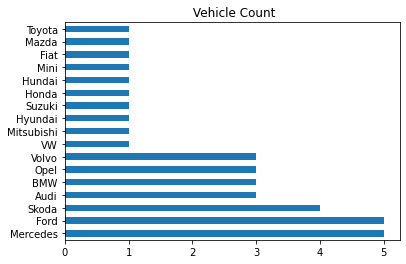

In [18]:
co2dfCopy["Car"].value_counts().plot(kind="barh", title=" Vehicle Count")

In [19]:
emissions = co2dfCopy[["Car", "CO2"]]
emissions_by_cars = emissions.groupby("Car")["CO2"].sum().reset_index().sort_values(by="CO2", ascending=True)
emissions_by_cars

,Car,CO2
2,Fiat,90
4,Honda,94
10,Mitsubishi,95
5,Hundai,97
14,Toyota,99
6,Hyundai,99
13,Suzuki,101
7,Mazda,104
15,VW,105
9,Mini,105


In [20]:
emissions_by_cars.describe()

,CO2
count,17.000000
mean,216.058824
std,155.314789
min,90.000000
25%,99.000000
50%,105.000000
75%,321.000000
max,528.000000


[Text(0.5, 1.0, 'Co2 emissions per Car')]

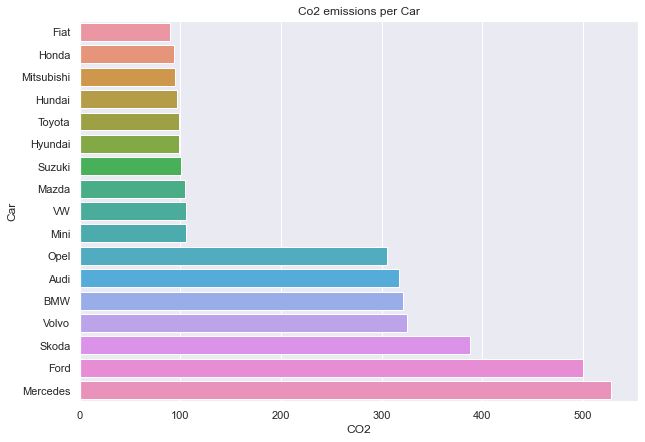

In [21]:
from turtle import title


sns.set(style = "darkgrid")
plt.figure(figsize = (10,7))

sns.barplot(x = "CO2", 
            y = "Car", 
            data = emissions_by_cars).set(title="Co2 emissions per Car")

[Text(0.5, 1.0, 'Co2 emissions per car')]

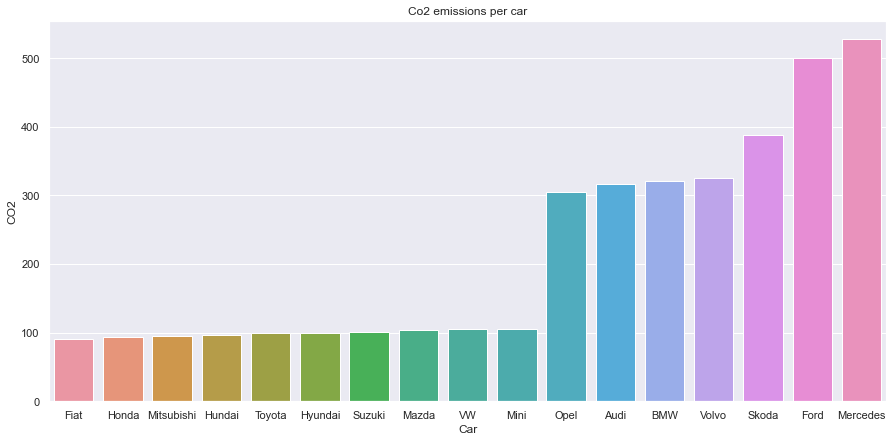

In [22]:
sns.set(style = "darkgrid")
plt.figure(figsize = (15,7))

sns.barplot(x = "Car", 
            y = "CO2", 
            data = emissions_by_cars).set(title = "Co2 emissions per car")

In [23]:
highest_lowest_emissions = emissions_by_cars[(emissions_by_cars["CO2"] == 528) | (emissions_by_cars["CO2"] == 90)]
highest_lowest_emissions

,Car,CO2
2,Fiat,90
8,Mercedes,528


[Text(0.5, 1.0, 'Hieghest vs Lowest emission')]

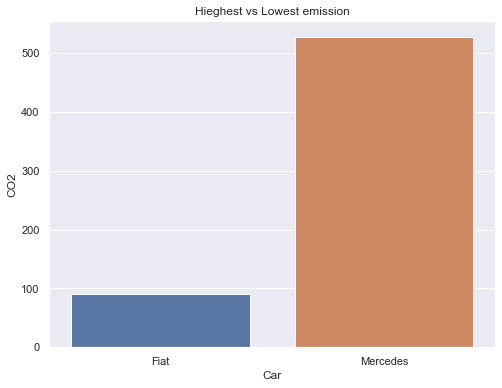

In [24]:
sns.set(style = "darkgrid")
plt.figure(figsize = (8,6))

sns.barplot(x = "Car", 
            y = "CO2", 
            data = highest_lowest_emissions,).set(title = "Hieghest vs Lowest emission")

In [25]:
co2dfCopy.sample(n=5)

,Car,Model,Volume,Weight,CO2
16,BMW,1,1600,1365,99
24,Volvo,S60,2000,1415,99
10,Hyundai,I20,1100,980,99
31,Volvo,XC70,2000,1746,117
9,Audi,A1,1600,1150,99


[Text(0.5, 1.0, '# of Cars per Model')]

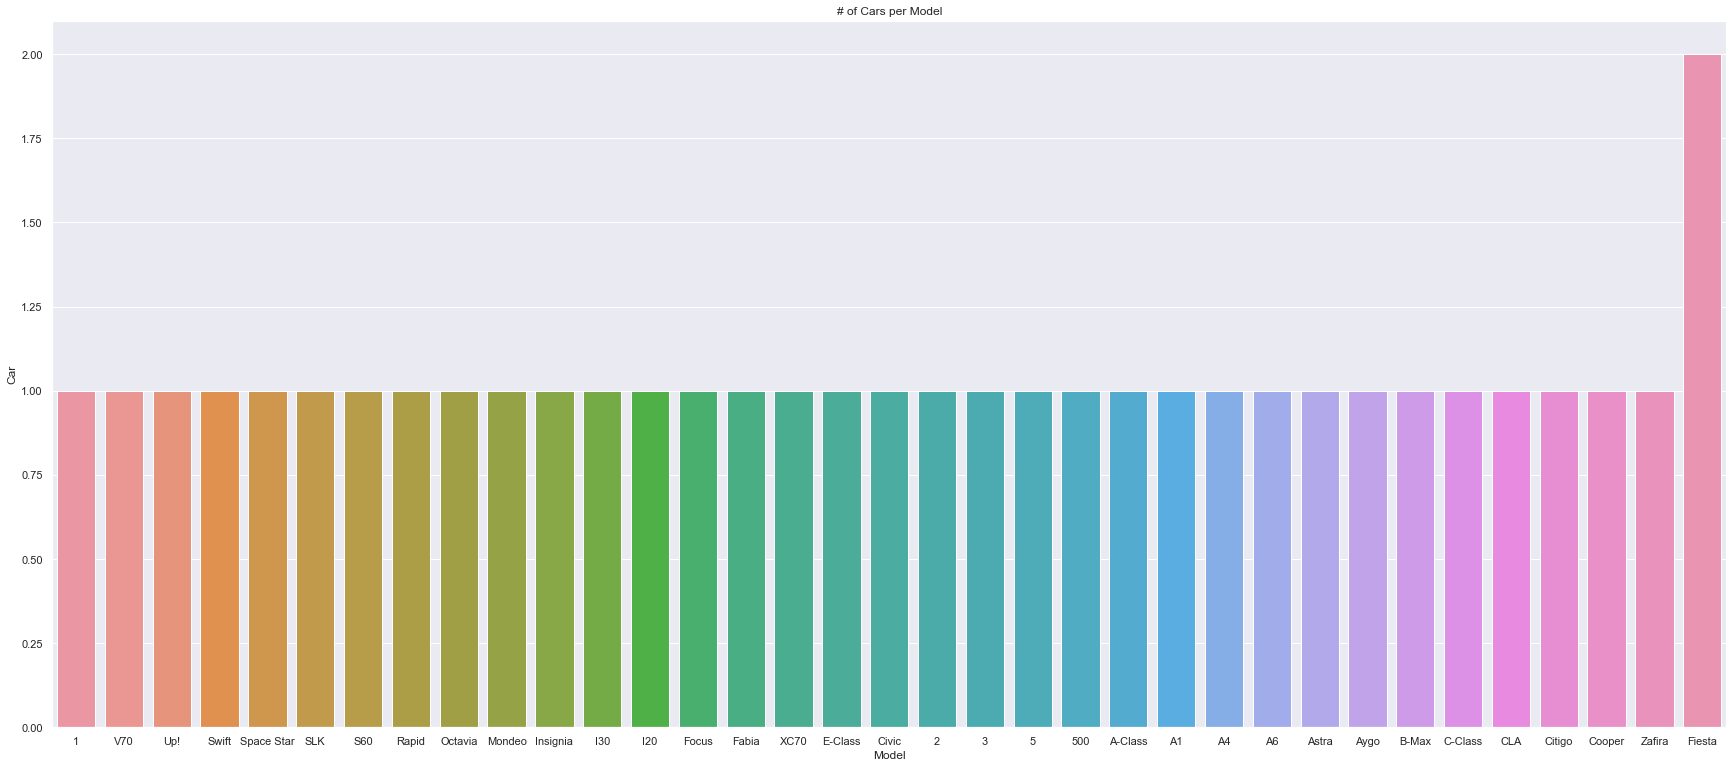

In [26]:
#Displays a bar chart of number of cars per Model
Models = co2dfCopy[["Car", "Model"]]
cars_by_Models = Models.groupby("Model")["Car"].count().reset_index().sort_values(by="Car", ascending=True)
cars_by_Models

sns.set(style = "darkgrid")
plt.figure(figsize = (30,13))

sns.barplot(x = "Model", 
            y = "Car", 
            data = cars_by_Models).set(title = "# of Cars per Model")

In [27]:
co2dfCopy[ (co2dfCopy["Model"] == "Fiesta") ]

,Car,Model,Volume,Weight,CO2
8,Ford,Fiesta,1500,1112,98
12,Ford,Fiesta,1000,1112,99


In [28]:
co2dfCopy["Weight"].describe()

count      36.000000
mean     1292.277778
std       242.123889
min       790.000000
25%      1117.250000
50%      1329.000000
75%      1418.250000
max      1746.000000
Name: Weight, dtype: float64

In [29]:
heaviest_Smallest = co2dfCopy[(co2dfCopy["Weight"] == 790)|(co2dfCopy["Weight"] == 1746)]
print("The smallest & heaviest vehicles in the set are: \n\n",heaviest_Smallest)

The smallest & heaviest vehicles in the set are: 

        Car Model  Volume  Weight  CO2
0   Toyota  Aygo    1000     790   99
31   Volvo  XC70    2000    1746  117


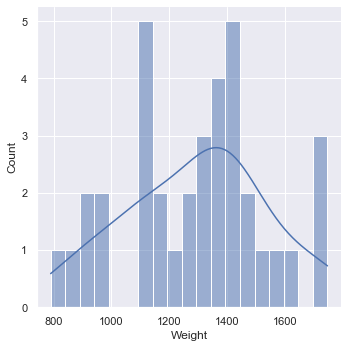

In [40]:
#how the total weight is destibuted
sns.displot(co2dfCopy['Weight'], kde=True, bins=19)

* most of the total weight lies somewhere between 1200 & 1600